# K-NN algorithm

#### How it works? 

Main idea of this algorithm is to find K nearest neighbors to the tested dot. Distance between neighbors we can calculate using [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) or using other formulas which uses another metricies.

#### Dataset example

In this project I am using [iris dataset.](https://archive.ics.uci.edu/ml/datasets/iris)

Import all dependencies.

In [308]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

Read data from CSV file via filename.

In [309]:
def get_data(filename):
    return pd.read_csv(filename).values

Plot all points on two axises. Uses three different colors for each class of iris flower.

In [310]:
def draw(X, Y):
    plt.scatter(list(map(lambda x: x[0], X)), Y, c=list(map(lambda x: 'blue' if x == 'Iris-virginica' else 'red' if x == 'Iris-versicolor' else 'green', Y)), marker='x')
    plt.show()

Measure distance between two points using Euclidean distance formula.  
Another function `get_neighbors` returns top K nearest points (neighbors).

In [311]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((np.array(x1) - np.array(x2)) ** 2))

def get_neighbors(point, data, k):
    n = [[unit, euclidean_distance(point[:-1], unit[:-1])] for unit in data]
    return sorted(n, key=lambda x: x[1])[:k]

For each unit in data set we test for correction.  
It's difficult to draw a 4-dimensional graph that's why I'm using only sepal length in cm.

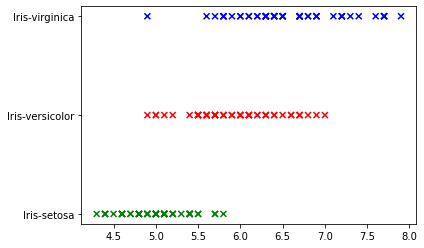

'Accuracy 100.0%'

In [313]:
K = 2

data = get_data('iris.csv')

X = list(map(lambda x: x[:4], data))
Y = list(map(lambda x: x[4], data))

Xtest = list(map(lambda x: x[:4], data))
Ytest = list(map(lambda x: x[4], data))

res = 0
for unit in data:
    n = get_neighbors(unit, data, K)
    n = max(map(lambda x: x[0][4], n)), key=n.count)
    res += 1 if n == unit[4] else 0

draw(X, Y)
    
f'Accuracy {res / len(data) * 100}%'